<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/chronic_kidney_diseases_prediction_updated_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mansoordaku/ckdisease

  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 22.8MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile("/content/ckdisease.zip",'r')
zip.extractall("/content")
zip.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
df=pd.read_csv('kidney_disease.csv',usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [6]:
df.shape

(400, 25)

In [7]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [9]:
df.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
252,45.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,82.0,...,46,9100,4.7,no,no,no,good,no,no,notckd
79,56.0,80.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,165.0,...,40,11800,5.0,yes,yes,no,poor,yes,no,ckd
264,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,132.0,...,50,5000,4.5,no,no,no,good,no,no,notckd
83,48.0,70.0,1.015,1.0,0.0,normal,normal,notpresent,notpresent,127.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
377,64.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,97.0,...,49,6400,4.8,no,no,no,good,no,no,notckd


In [10]:
# Number of times to replicate the DataFrame
replications = 500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_500r = pd.DataFrame(expanded_df)

<ipython-input-10-cfa04b57b5f5>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [11]:
# Number of times to replicate the DataFrame
replications = 1500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 1500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_1500r = pd.DataFrame(expanded_df)

<ipython-input-11-a40a364fd13d>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [12]:
df_1500r.shape

(1500, 25)

In [13]:
# Number of times to replicate the DataFrame
replications = 2500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 2500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 500 rows
df_2500r = pd.DataFrame(expanded_df)

<ipython-input-13-10f9cd8e441c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [14]:
df_2500r.shape

(2500, 25)

In [15]:
# Number of times to replicate the DataFrame
replications = 5500 // 400  # 1 time in this case

# Replicate the DataFrame
expanded_df = pd.concat([df] * replications, ignore_index=True)

# If the desired number of rows is not a multiple of the original number of rows,
# you can append the remaining rows from the original DataFrame
remaining_rows = 5500 % 400
expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)

# The expanded DataFrame with 5500 rows
df_5500r = pd.DataFrame(expanded_df)

<ipython-input-15-60fcd4c75198>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_df = expanded_df.append(df[:remaining_rows], ignore_index=True)


In [16]:
df_5500r.shape

(5500, 25)

In [17]:
df=df_5500r

In [18]:
df['classification'].value_counts()

ckd       3472
notckd    2000
ckd\t       28
Name: classification, dtype: int64

### **Data Preparations**
1. Data Cleaning
2. Data Explorations
3. Data Splitting
4. Feature Engineering
5. Model Training
6. Model Improvements

### **1. Data Cleaning**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5374 non-null   float64
 1   bp              5333 non-null   float64
 2   sg              4844 non-null   float64
 3   al              4858 non-null   float64
 4   su              4816 non-null   float64
 5   rbc             3377 non-null   object 
 6   pc              4595 non-null   object 
 7   pcc             5447 non-null   object 
 8   ba              5447 non-null   object 
 9   bgr             4888 non-null   float64
 10  bu              5238 non-null   float64
 11  sc              5265 non-null   float64
 12  sod             4286 non-null   float64
 13  pot             4272 non-null   float64
 14  hemo            4777 non-null   float64
 15  pcv             4523 non-null   object 
 16  wc              4034 non-null   object 
 17  rc              3684 non-null   o

In [20]:
df.isnull().sum()

age                126
bp                 167
sg                 656
al                 642
su                 684
rbc               2123
pc                 905
pcc                 53
ba                  53
bgr                612
bu                 262
sc                 235
sod               1214
pot               1228
hemo               723
pcv                977
wc                1466
rc                1816
htn                 28
dm                  28
cad                 28
appet               14
pe                  14
ane                 14
classification       0
dtype: int64

In [21]:
age_m=df['age'].mean()
df['age']=df['age'].fillna(age_m)

In [22]:
df['age']=df['age'].astype(int)

In [23]:
bp_mean=df['bp'].mean()
df['bp']=df['bp'].fillna(bp_mean)

In [24]:
sg_m=df['sg'].mean()
df['sg']=df['sg'].fillna(sg_m)

In [25]:
al_m=df['al'].mean()
df['al']=df['al'].fillna(al_m)

In [26]:
su_m=df['su'].mean()
df['su']=df['su'].fillna(su_m)

In [27]:
rbc_m=df['rbc'].mode()
print(rbc_m)
df['rbc']=df['rbc'].fillna('normal')

0    normal
Name: rbc, dtype: object


In [28]:
pc_m=df['pc'].mode()
print(pc_m)
df['pc']=df['pc'].fillna('normal')

0    normal
Name: pc, dtype: object


In [29]:
pcc_m=df['pcc'].mode()
print(pcc_m)
df['pcc']=df['pcc'].fillna('notpresent')

0    notpresent
Name: pcc, dtype: object


In [30]:
ba_m=df['ba'].mode()
print(ba_m)
df['ba']=df['ba'].fillna('notpresent')

0    notpresent
Name: ba, dtype: object


In [31]:
bgr_m=df['bgr'].mean()
df['bgr']=df['bgr'].fillna(bgr_m)

In [32]:
bu_m=df['bu'].mean()
df['bu']=df['bu'].fillna(bu_m)

In [33]:
sc_m=df['sc'].mean()
df['sc']=df['sc'].fillna(sc_m)

In [34]:
sod_m=df['sod'].mean()
df['sod']=df['sod'].fillna(sod_m)

In [35]:
pot_m=df['pot'].mean()
df['pot']=df['pot'].fillna(pot_m)

In [36]:
hemo_m=df['hemo'].mean()
print(hemo_m)
df['hemo']=df['hemo'].fillna(12.52)

12.472116391040403


In [37]:
pcv_m=df['pcv'].mode()
pcv_m

0    41
Name: pcv, dtype: object

In [38]:
df['pcv']=df['pcv'].fillna('52')

In [39]:
wc_m=df['wc'].mode()
print(wc_m)
df['wc']=df['wc'].fillna('9800')

0    9800
Name: wc, dtype: object


In [40]:
rc_m=df['rc'].mode()
print(rc_m)
df['rc']=df['rc'].fillna('5.2')

0    5.2
Name: rc, dtype: object


In [41]:
htn_m=df['htn'].mode()
print(htn_m)
df['htn']=df['htn'].fillna('no')

0    no
Name: htn, dtype: object


In [42]:
dm_m=df['dm'].mode()
print(dm_m)
df['dm']=df['dm'].fillna('no')

0    no
Name: dm, dtype: object


In [43]:
cad_m=df['cad'].mode()
print(cad_m)
df['cad']=df['cad'].fillna('no')

0    no
Name: cad, dtype: object


In [44]:
appet_m=df['appet'].mode()
print(appet_m)
df['appet']=df['appet'].fillna('good')

0    good
Name: appet, dtype: object


In [45]:
pe_m=df['pe'].mode()
print(pe_m)
df['pe']=df['pe'].fillna('no')

0    no
Name: pe, dtype: object


In [46]:
ane_m=df['ane'].mode()
print(ane_m)
df['ane']=df['ane'].fillna('no')

0    no
Name: ane, dtype: object


In [47]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [48]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,51.544364,76.589162,1.017305,1.037464,0.459302,148.846563,57.868041,3.113466,137.425338,4.634855,12.478411
std,16.958633,13.505819,0.005358,1.274991,1.035822,75.131467,49.547527,5.653788,9.236168,2.840514,2.707788
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,102.000000,27.000000,0.900000,135.000000,4.000000,10.800000
50%,54.000000,80.000000,1.017305,1.000000,0.000000,127.000000,45.000000,1.400000,137.425338,4.634855,12.520000
75%,64.000000,80.000000,1.020000,2.000000,0.459302,153.000000,65.000000,3.113466,141.000000,4.800000,14.500000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [49]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [50]:
df['classification']=df['classification'].str.replace('ckd\t','ckd')

In [51]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [52]:
unique_cat=[]
for i,v in enumerate(df.columns):
    if df[v].dtype == 'object':
        unique_cat.append(f"{v}:- {df[v].unique()}")

In [53]:
unique_cat

["rbc:- ['normal' 'abnormal']",
 "pc:- ['normal' 'abnormal']",
 "pcc:- ['notpresent' 'present']",
 "ba:- ['notpresent' 'present']",
 "pcv:- ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '52' '16' '24' '37'\n '30' '34' '40' '45' '27' '48' '\\t?' '14' '22' '18' '42' '17' '46' '23'\n '19' '25' '41' '26' '15' '21' '43' '20' '\\t43' '47' '9' '49' '50' '53'\n '51' '54']",
 "wc:- ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'\n '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'\n '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'\n '7700' '14600' '6300' '\\t6200' '7100' '11800' '9400' '5500' '5800'\n '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'\n '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'\n '12400' '\\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'\n '12800' '11200' '19100' '\\t?' '12300' '16700' '2600' '26400' '8800'\n '7400' '4900' '8000' '12000' '15700' '410

In [54]:
##Regex Library
import re


def clean_regex(column_values):
    cleaned_values = []
    for item in column_values:
        cleaned_item = re.sub(r'[\n\t\'\[\]]', '', str(item))
        cleaned_values.append(cleaned_item)
    return cleaned_values

In [55]:
df['pcv'] = clean_regex(df['pcv'].values)

print(df['pcv'].unique())
print("PCV lenght:- ",len(df['pcv']))

['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '52' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '?' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
PCV lenght:-  5500


In [56]:
df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value

<ipython-input-56-020152f9962c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['pcv']=df['pcv'].str.replace("?","46.5")##45.6 is most frequent value


In [57]:
df['wc'] = clean_regex(df['wc'].values)

In [58]:
wc_m=df['wc'].mode()
wc_m

0    9800
Name: wc, dtype: object

In [59]:
df['wc']=df['wc'].str.replace('?','9800')
print(df['wc'].unique())
print("Wc lenght:- ",len(df['wc']))

['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '6600']
Wc lenght:-  5500


<ipython-input-59-bcd4385e20df>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['wc']=df['wc'].str.replace('?','9800')


In [60]:
df['rc'] = clean_regex(df['rc'].values)

In [61]:
df['rc'].unique()

array(['5.2', '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4', '2.6',
       '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2', '4.5',
       '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3', '2.9',
       '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '?', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [62]:
for i in range(len(df['dm'])):
    if df['dm'].values[i] == '\tno':
        df['dm'][i] = df['dm'][i].replace('\tno', 'no')
    elif df['dm'].values[i] == '\\tyes':
        df['dm'][i] = df['dm'][i].replace('\\tyes', 'yes')
    elif df['dm'].values[i]==' yes':
        df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
    elif df['dm'].values[i]=='\tyes':
        df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')

<ipython-input-62-a63fac1e8500>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace(' yes', 'yes')
<ipython-input-62-a63fac1e8500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tno', 'no')
<ipython-input-62-a63fac1e8500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'][i] = df['dm'][i].replace('\tyes', 'yes')


In [63]:
df['dm'].unique()

array(['yes', 'no'], dtype=object)

In [64]:
for i in range(len(df['cad'])):
    if df['cad'].values[i] == '\tno':
        df['cad'][i] = df['cad'][i].replace('\tno', 'no')

<ipython-input-64-f2fca49e0381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cad'][i] = df['cad'][i].replace('\tno', 'no')


In [65]:
df['cad'].unique()

array(['no', 'yes'], dtype=object)

### **2. Data Exploration**

In [66]:
##importing the required library for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
cat = []
cat_i = []
num = []
num_i = []

for i, v in enumerate(df.columns):
    if df[v].dtypes in ['float64','int64']: #== 'float64' or df[v].dtypes == 'int64':
        num.append(v)
        num_i.append(i)
    else:
        cat.append(v)
        cat_i.append(i)

In [68]:
cat,num

(['rbc',
  'pc',
  'pcc',
  'ba',
  'pcv',
  'wc',
  'rc',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'],
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

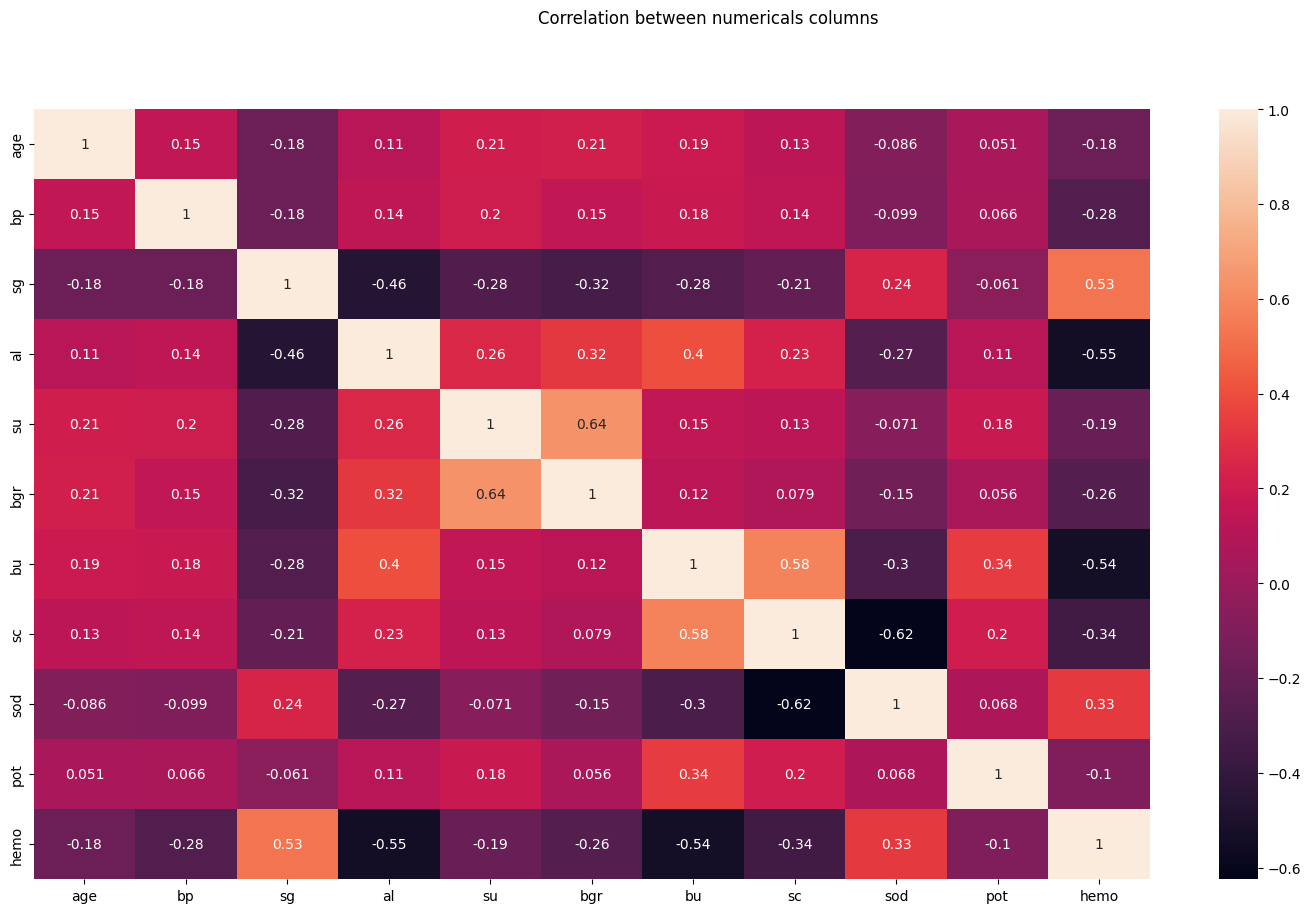

In [69]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num].corr(),annot=True)
plt.suptitle("Correlation between numericals columns")
plt.show()

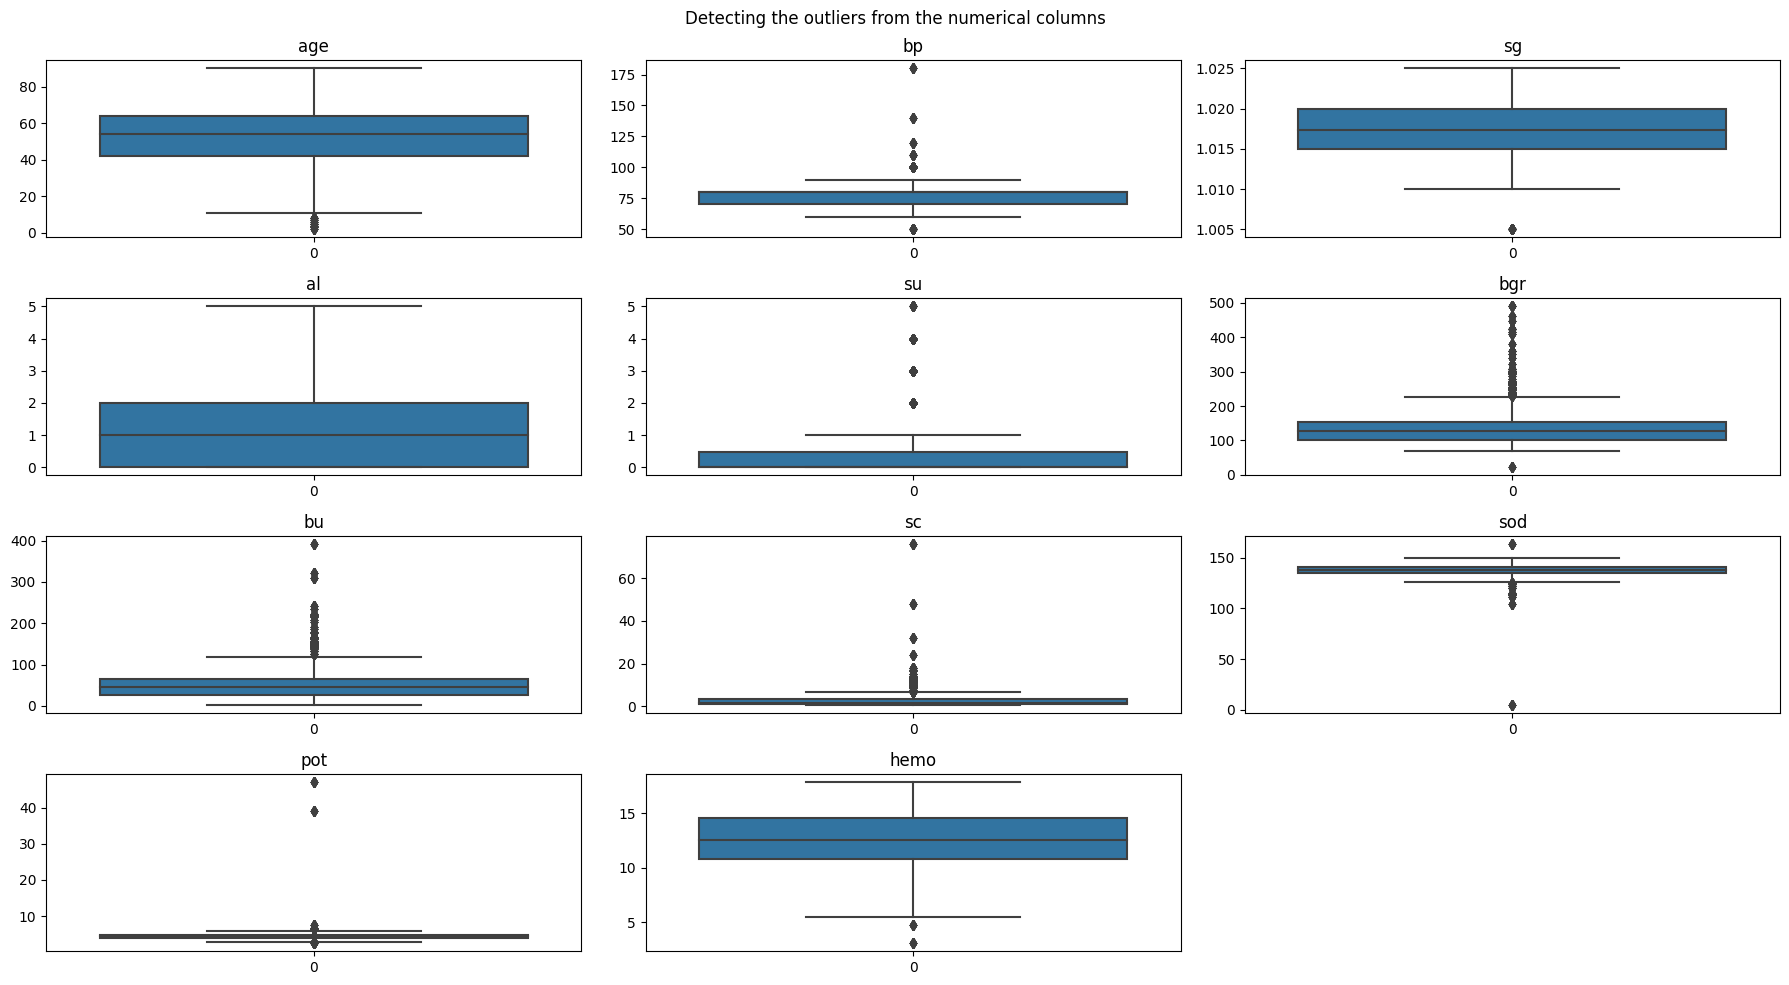

In [70]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[v])
    plt.title(v)
plt.suptitle("Detecting the outliers from the numerical columns")
plt.tight_layout()
plt.show()

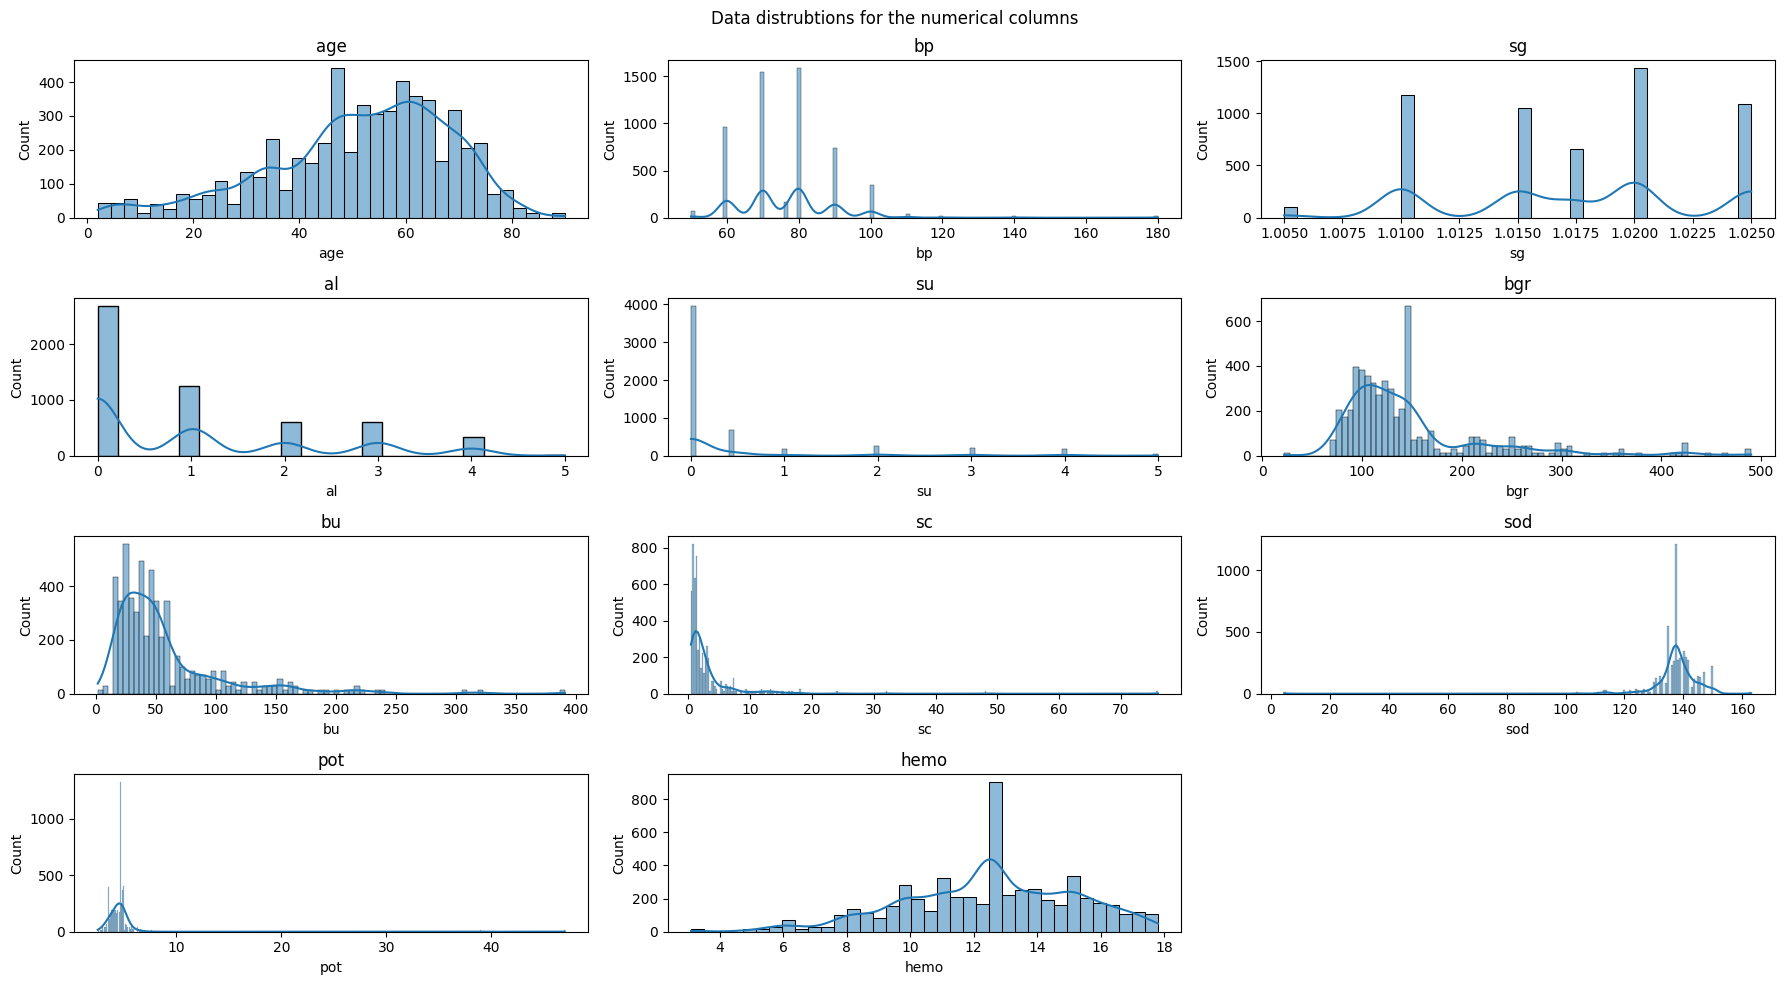

In [71]:
##detecting the outliers
plt.figure(figsize=(18,10))
for i,v in enumerate(df[num]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[v],kde=True)
    plt.title(v)
plt.suptitle("Data distrubtions for the numerical columns")
plt.tight_layout()
plt.show()

In [72]:
# plt.figure(figsize=(20,10)
# sns.pairplot(df)

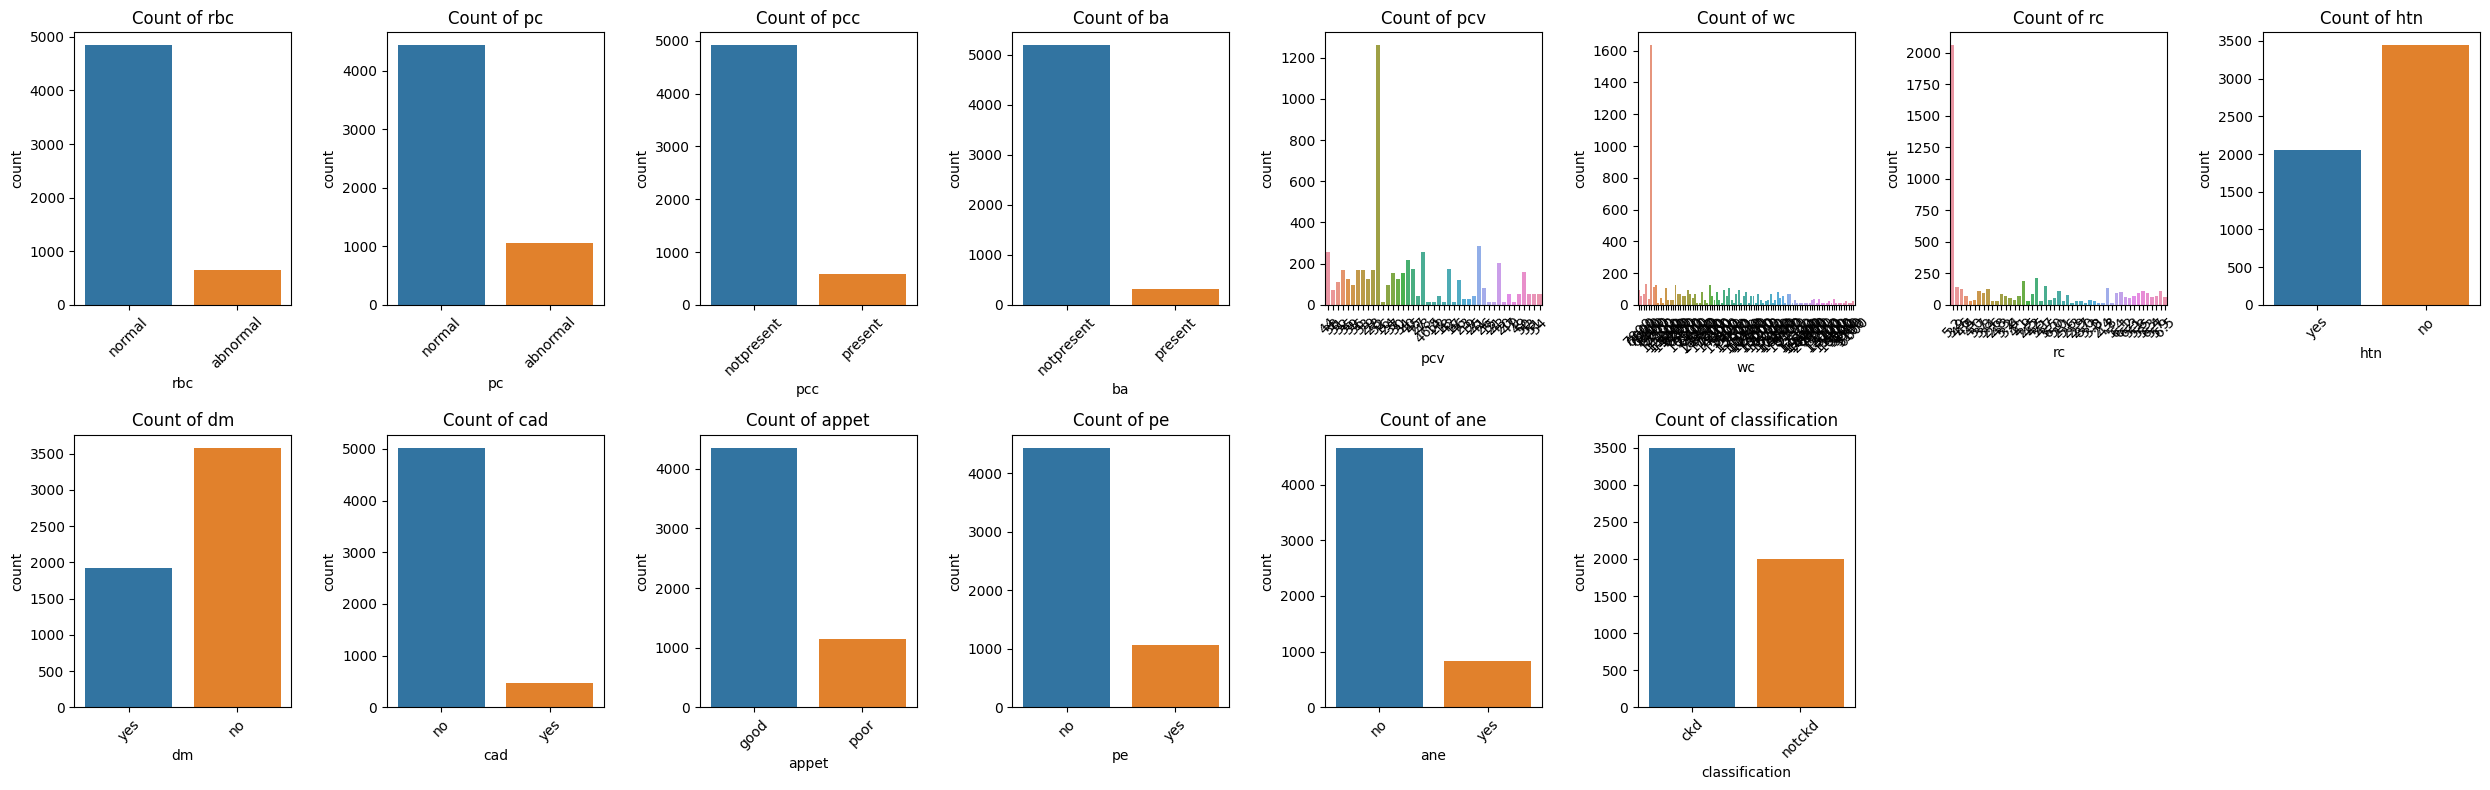

In [73]:
num_plots = len(cat)
rows = (num_plots + 7) // 8  # Calculate the number of rows needed

plt.figure(figsize=(25, rows * 4))  # Adjust the figure size based on the number of rows

for i, col in enumerate(cat, start=1):
    plt.subplot(rows, 8, i)  # Adjust the subplot position
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### **3. Data Splitting**

In [74]:
df.to_csv("Chronic_kidney_disease(clean_ds5200).csv")

In [75]:
from sklearn.model_selection import train_test_split,GridSearchCV
##preprocessing libraries from sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
## model train libraries from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
##import the pipeline
from sklearn.pipeline import Pipeline
## importing the columnstransformer
from sklearn.compose import ColumnTransformer
##importing the model evaluations
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,roc_curve

In [76]:
new_df=df.copy()

In [77]:
new_df.shape

(5500, 25)

In [78]:
X=new_df.drop(columns='classification')
y=new_df['classification']

In [79]:
le=LabelEncoder()

In [80]:
y=le.fit_transform(y)

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [82]:
print("X_train shape:- ",X_train.shape," X_test shape:- ",X_test.shape," y_train shape:- ",y_train.shape," y_test shape:- ",y_test.shape)

X_train shape:-  (3685, 24)  X_test shape:-  (1815, 24)  y_train shape:-  (3685,)  y_test shape:-  (1815,)


#### **M-1**

In [83]:
lgr=LogisticRegression()

In [84]:
cat_i

[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [85]:
onh = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
stc=StandardScaler()

tf1=ColumnTransformer([
    ('onh',onh,[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
],remainder='passthrough')


tf2=ColumnTransformer([
    ('stc',stc,slice(0,None)),
],remainder='passthrough')

In [86]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lgr',lgr),
])

In [87]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lgr', LogisticRegression())])

In [88]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [89]:
score_lgr=accuracy_score(y_test,y_pred_lgr)
print("Score of Logistic Regression:- ",score_lgr)

Score of Logistic Regression:-  1.0


In [90]:
score_train_lgr=pipe_lgr.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_lgr)

Score on Training dataset:-  1.0


In [91]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



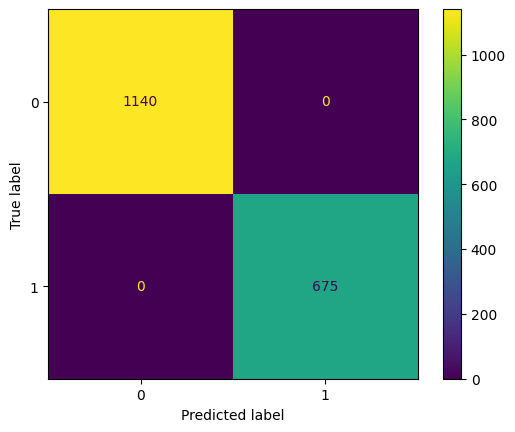

In [92]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

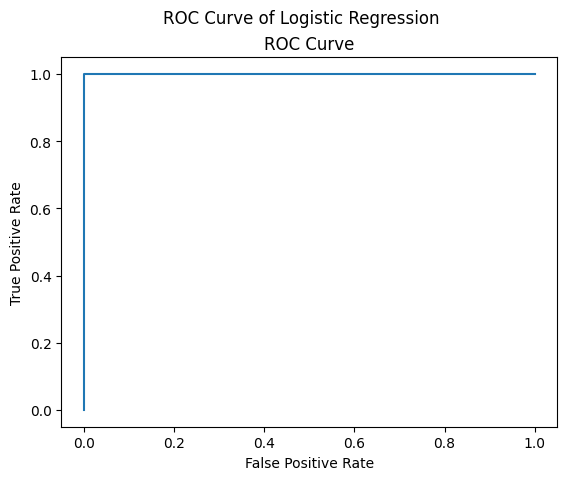

In [93]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgr)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Logistic Regression")
plt.show()

### M-2

In [94]:
knn=KNeighborsClassifier(n_neighbors=10)

In [95]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [96]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [97]:
y_pred_knn=pipe_knn.predict(X_test)

In [98]:
score_knn=accuracy_score(y_test,y_pred_knn)
print("Score of knn:- ",score_knn)

Score of knn:-  0.9840220385674932


In [99]:
score_train_knn=pipe_knn.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_knn)

Score on Training dataset:-  0.9967435549525102


In [100]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1140
           1       1.00      0.96      0.98       675

    accuracy                           0.98      1815
   macro avg       0.99      0.98      0.98      1815
weighted avg       0.98      0.98      0.98      1815



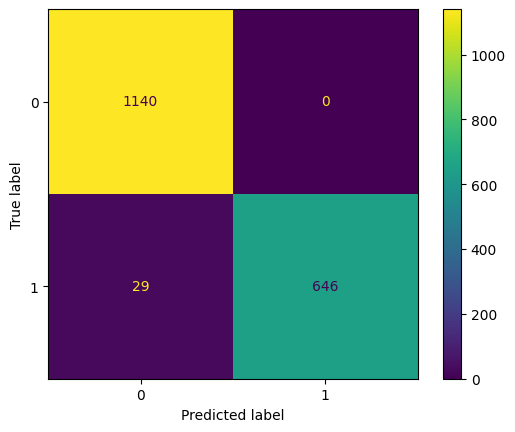

In [101]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

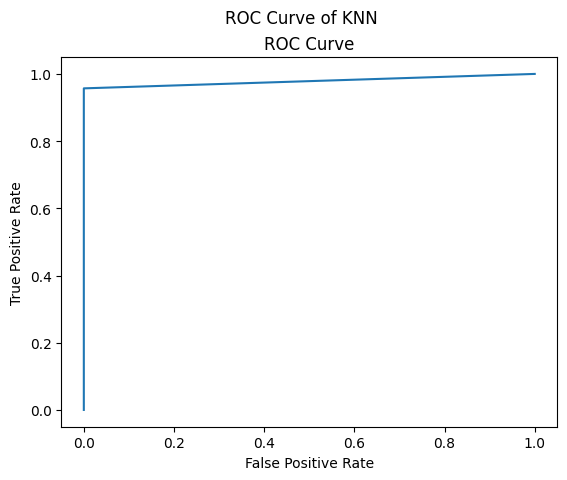

In [102]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of KNN")
plt.show()

### **M-3**

In [103]:
svc=SVC()

In [104]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [105]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [106]:
y_pred_svc=pipe_svc.predict(X_test)

In [107]:
score_svc=accuracy_score(y_test,y_pred_svc)
print("Score of svc:- ",score_svc)

Score of svc:-  1.0


In [108]:
score_train_svc=pipe_svc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_svc)

Score on Training dataset:-  1.0


In [109]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



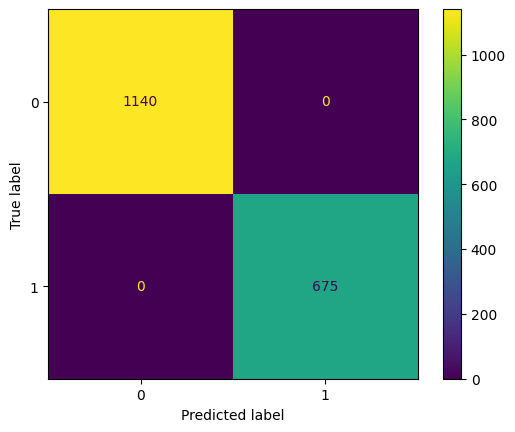

In [110]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

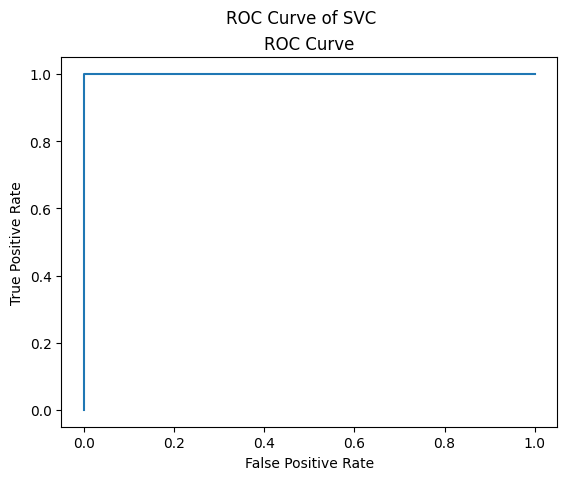

In [111]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of SVC")
plt.show()

### **M-4**

In [112]:
dtc=DecisionTreeClassifier()
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [113]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [114]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [115]:
score_dtc=accuracy_score(y_test,y_pred_dtc)
print("Score of Decision tree:- ",score_dtc)

Score of Decision tree:-  1.0


In [116]:
score_train_dtc=pipe_dtc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_dtc)

Score on Training dataset:-  1.0


In [117]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



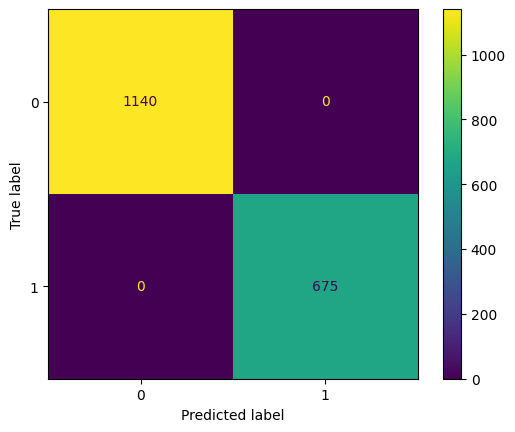

In [118]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

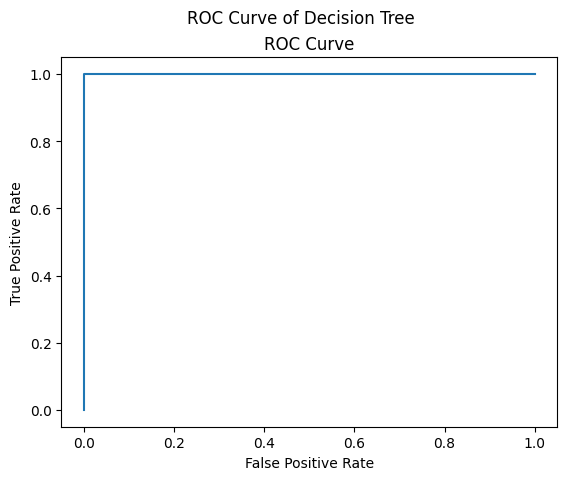

In [119]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Decision Tree")
plt.show()

### **M-5**

In [120]:
rfc=RandomForestClassifier()
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rfc',rfc)
])

In [121]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rfc', RandomForestClassifier())])

In [122]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [123]:
score_rfc=accuracy_score(y_test,y_pred_rfc)
print("Score of Random forest(Testing dataset):- ",score_rfc)

Score of Random forest(Testing dataset):-  1.0


In [124]:
score_train_rfc=pipe_rfc.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_rfc)

Score on Training dataset:-  1.0


In [125]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



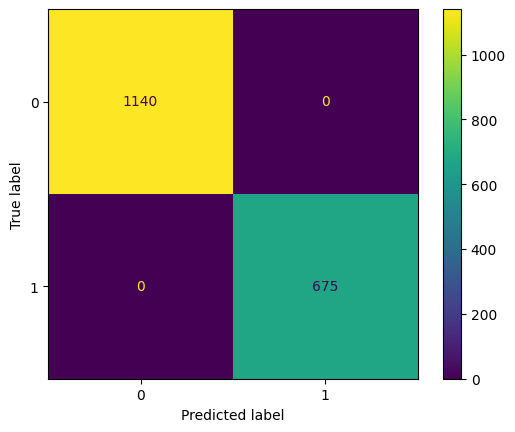

In [126]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

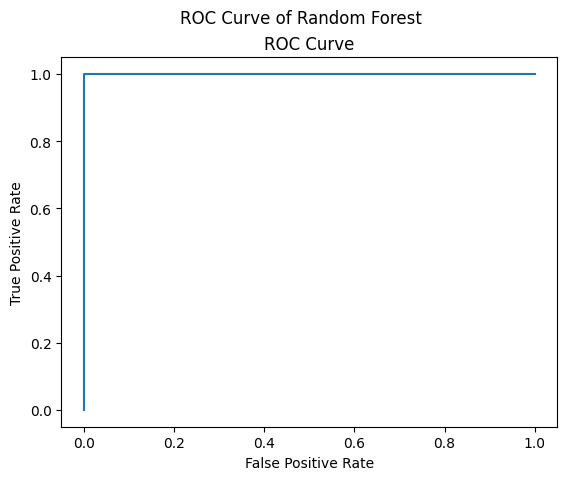

In [127]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Random Forest")
plt.show()

### **M-6**

In [128]:
bgg=BaggingClassifier(estimator=rfc)

pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('bgg',bgg)
])

In [129]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('bgg', BaggingClassifier(estimator=RandomForestClassifier()))])

In [130]:
y_pred_bgg=pipe_bgg.predict(X_test)

In [131]:
score_bgg=accuracy_score(y_test,y_pred_bgg)
print("Score of Bagging with Random Forest:- ",score_bgg)

Score of Bagging with Random Forest:-  1.0


In [132]:
score_train_bgg=pipe_bgg.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_bgg)

Score on Training dataset:-  1.0


In [133]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



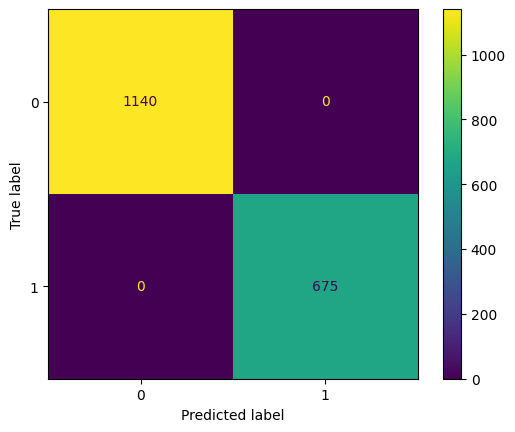

In [134]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

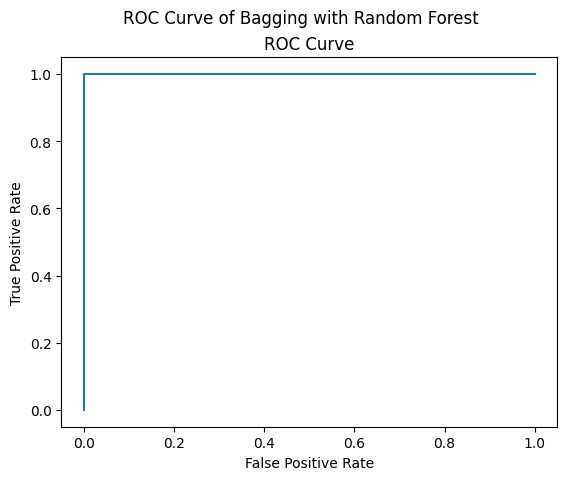

In [135]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bgg)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Bagging with Random Forest")
plt.show()

### **M-7**

In [136]:
ada=AdaBoostClassifier()
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('ada',ada)
])

In [137]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('ada', AdaBoostClassifier())])

In [138]:
y_pred_ada=pipe_ada.predict(X_test)

In [139]:
score_ada=accuracy_score(y_test,y_pred_ada)
print("Score of AdaBoosting Classifier(Testing score):- ",score_ada)

Score of AdaBoosting Classifier(Testing score):-  1.0


In [140]:
score_train_ada=pipe_ada.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_ada)

Score on Training dataset:-  1.0


In [141]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



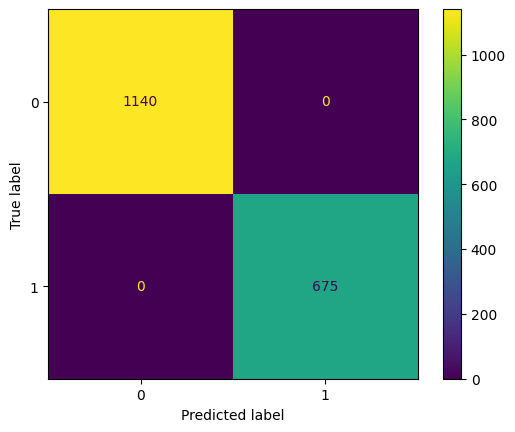

In [142]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

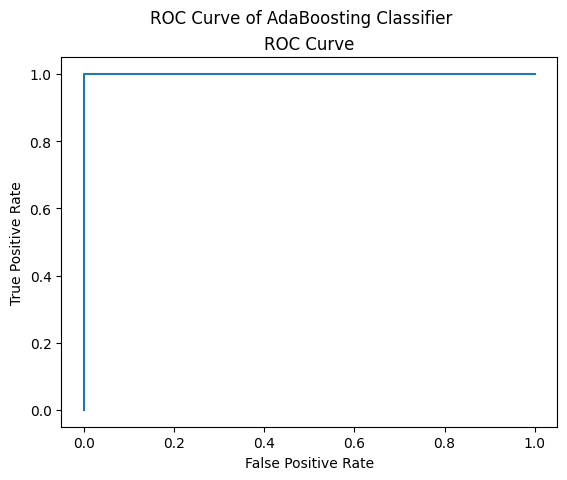

In [143]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of AdaBoosting Classifier")
plt.show()

### **M-8**

In [144]:
grd_en=GradientBoostingClassifier()

pipe_grd_en=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('grd_en',grd_en)
])

In [145]:
pipe_grd_en.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('grd_en', GradientBoostingClassifier())])

In [146]:
y_pred_grd_en=pipe_grd_en.predict(X_test)

In [147]:
score_grd=accuracy_score(y_test,y_pred_grd_en)
print("Score of Gradient BoostingClassifier:- ",score_grd)

Score of Gradient BoostingClassifier:-  1.0


In [148]:
score_train_grd=pipe_grd_en.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_grd)

Score on Training dataset:-  1.0


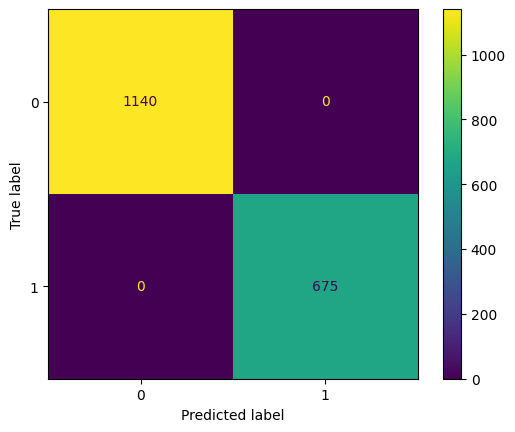

In [149]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_grd_en)).plot()

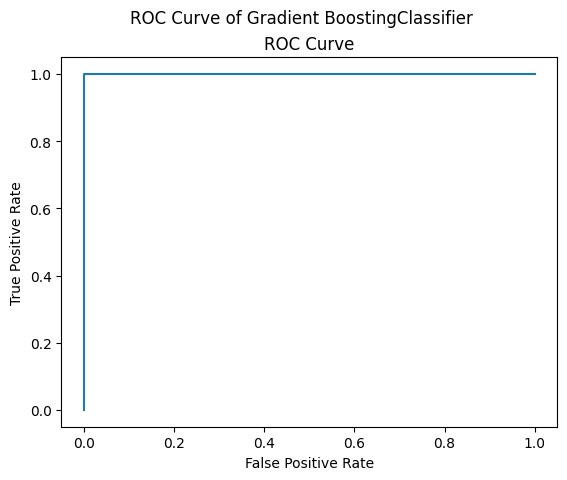

In [150]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grd_en)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of Gradient BoostingClassifier")
plt.show()

### **M-9**

In [151]:
xgb=XGBClassifier()

pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgb',xgb)
])

In [152]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 6, 7, 8, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgb',
                 XGBClassifier(base_score=None, boos...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [153]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [154]:
score_xgb=accuracy_score(y_test,y_pred_xgb)
print("Score of XGBoosting classifier:- ",score_xgb)

Score of XGBoosting classifier:-  1.0


In [155]:
score_train_xgb=pipe_xgb.score(X_train,y_train)
print("Score on Training dataset:- ",score_train_xgb)

Score on Training dataset:-  1.0


In [156]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1140
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1815
   macro avg       1.00      1.00      1.00      1815
weighted avg       1.00      1.00      1.00      1815



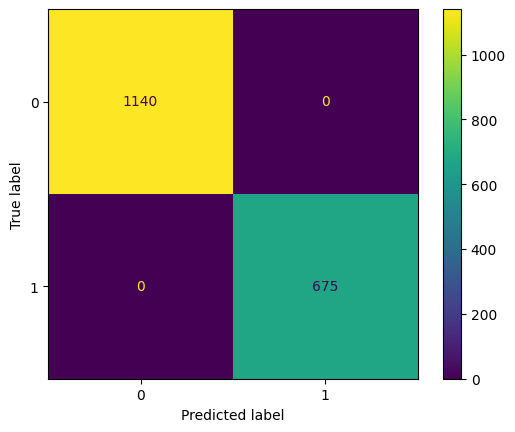

In [157]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

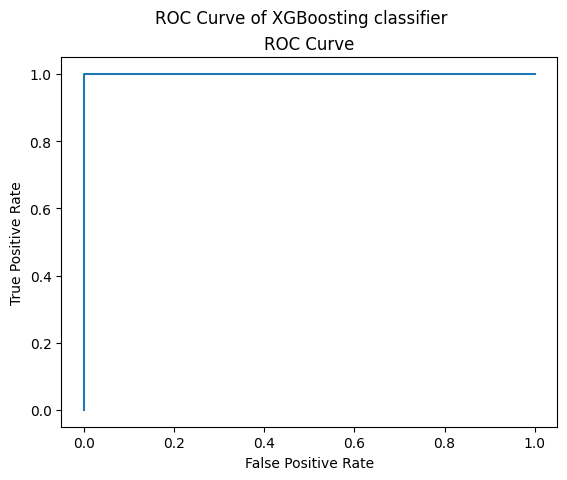

In [158]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of XGBoosting classifier")
plt.show()

In [159]:
s={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier'],
    'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb],
    'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb],
}

In [160]:
pd.DataFrame(s)

,Model Name,Test Score,Train Score
0,Logistic Regression,1.000000,1.000000
1,KNN,0.984022,0.996744
2,SVC,1.000000,1.000000
3,Decision Tree,1.000000,1.000000
4,Random Forest,1.000000,1.000000
5,Bagging classifier,1.000000,1.000000
6,AdaBoosting Classifier,1.000000,1.000000
7,Gradient_Boosting classifier,1.000000,1.000000
8,XGBoosting classifier,1.000000,1.000000


#### **ANN-Implementation**

In [161]:
X_train_onh=onh.fit_transform(X_train)
X_test_onh=onh.transform(X_test)

In [162]:
X_train_scaled=stc.fit_transform(X_train_onh)
X_test_scaled=stc.transform(X_test_onh)

In [163]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [164]:
##model init
model=Sequential()

##model creating
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [165]:
##model compiling
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [166]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test),batch_size=64)

Epoch 1/50
58/58 [==============================] - 5s 13ms/step - loss: 0.6581 - accuracy: 0.6649 - val_loss: 0.3620 - val_accuracy: 0.9686
Epoch 2/50
58/58 [==============================] - 1s 13ms/step - loss: 0.2828 - accuracy: 0.8923 - val_loss: 0.0772 - val_accuracy: 1.0000
Epoch 3/50
58/58 [==============================] - 0s 8ms/step - loss: 0.1170 - accuracy: 0.9764 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 4/50
58/58 [==============================] - 0s 8ms/step - loss: 0.0675 - accuracy: 0.9910 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/50
58/58 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9948 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/50
58/58 [==============================] - 0s 8ms/step - loss: 0.0301 - accuracy: 0.9981 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/50
58/58 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.9976 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 8/50
58/58 [

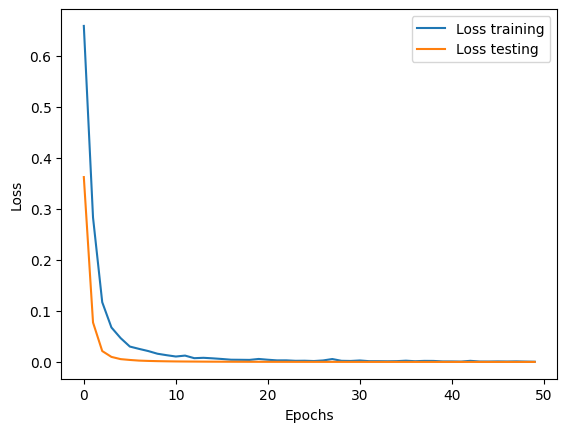

In [167]:
plt.plot(history.history['loss'],label='Loss training')
plt.plot(history.history['val_loss'],label='Loss testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

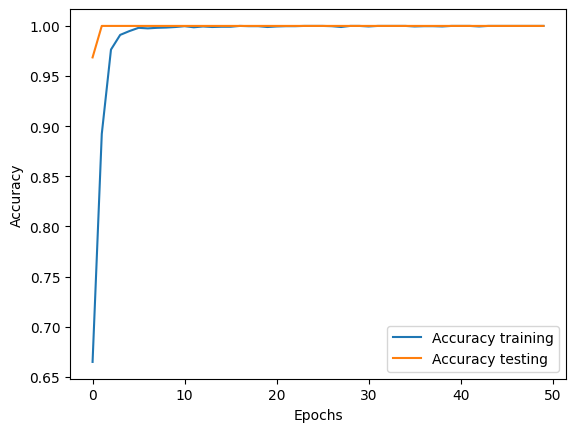

In [168]:
plt.plot(history.history['accuracy'],label='Accuracy training')
plt.plot(history.history['val_accuracy'],label='Accuracy testing')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [169]:
y_pred_ann=model.predict(X_test_scaled)

57/57 [==============================] - 0s 3ms/step


In [170]:
threshold=0.5

y_pred_ann=(y_pred_ann >= threshold).astype(int)

In [171]:
score_ann=accuracy_score(y_test,y_pred_ann)
print("Score of ANN(Testing):- ",score_ann)

Score of ANN(Testing):-  1.0


In [172]:
score_train_ann=model.evaluate(X_train_scaled,y_train)
print("Score on Training dataset:- ",score_train_ann[1])

116/116 [==============================] - 0s 2ms/step - loss: 1.2571e-05 - accuracy: 1.0000
Score on Training dataset:-  1.0


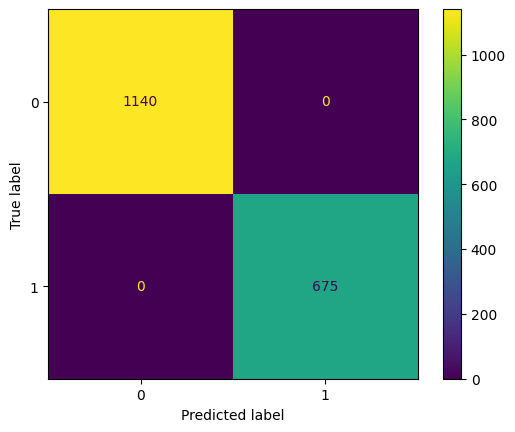

In [173]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ann)).plot()

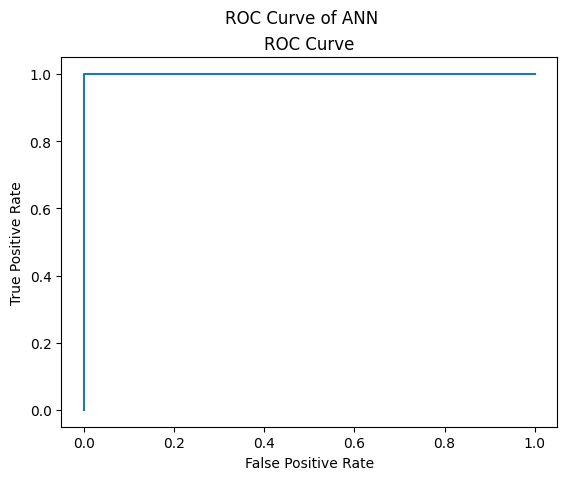

In [174]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle("ROC Curve of ANN")
plt.show()

In [175]:
# s1={
#     'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
#     'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann],
#     'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb,score_train_ann[1]],
# }

# s2={
#     'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
#     'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann],
#     'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb,score_train_ann[1]],
# }

# s3={
#     'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
#     'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann],
#     'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb,score_train_ann[1]],
# }

s4={
    'Model Name':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Bagging classifier','AdaBoosting Classifier','Gradient_Boosting classifier','XGBoosting classifier','ANN'],
    'Test Score':[score_lgr,score_knn,score_svc,score_dtc,score_rfc,score_bgg,score_ada,score_grd,score_xgb,score_ann],
    'Train Score':[score_train_lgr,score_train_knn,score_train_svc,score_train_dtc,score_train_rfc,score_train_bgg,score_train_ada,score_train_grd,score_train_xgb,score_train_ann[1]],
}

In [176]:
# score500=pd.DataFrame(s)
# score500

# score1500=pd.DataFrame(s2)
# score1500

# score2500=pd.DataFrame(s3)
# score2500

score5500=pd.DataFrame(s4)
score5500

,Model Name,Test Score,Train Score
0,Logistic Regression,1.000000,1.000000
1,KNN,0.984022,0.996744
2,SVC,1.000000,1.000000
3,Decision Tree,1.000000,1.000000
4,Random Forest,1.000000,1.000000
5,Bagging classifier,1.000000,1.000000
6,AdaBoosting Classifier,1.000000,1.000000
7,Gradient_Boosting classifier,1.000000,1.000000
8,XGBoosting classifier,1.000000,1.000000
9,ANN,1.000000,1.000000


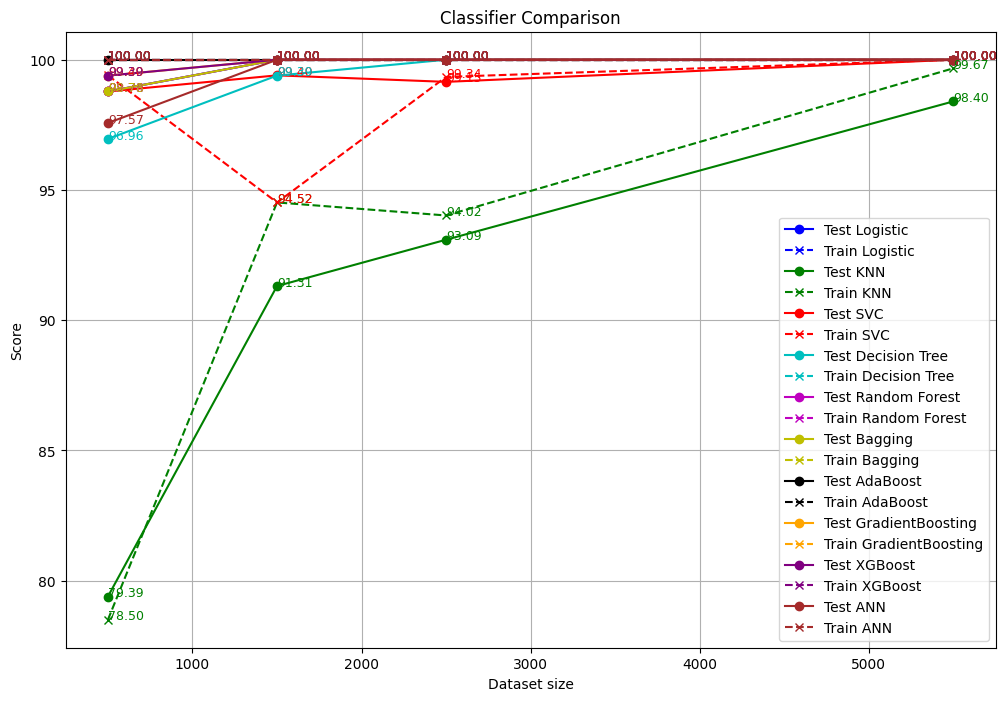

In [181]:
dataset_sizes = [500, 1500, 2500, 5500]

# Data for different classifiers
classifiers = [
    ("Logistic", [98.78, 100, 100, 100], [100, 100, 100, 100]),
    ("KNN", [79.39, 91.31, 93.09, 98.40], [78.50, 94.52, 94.02, 99.67]),
    ("SVC", [98.78, 99.40, 99.15, 100], [99.40, 94.52, 99.34, 100]),
    ("Decision Tree", [96.96, 99.39, 100, 100], [100, 100, 100, 100]),
    ("Random Forest", [98.78, 100, 100, 100], [100, 100, 100, 100]),
    ("Bagging", [98.78, 100, 100, 100], [100, 100, 100, 100]),
    ("AdaBoost", [100, 100, 100, 100], [100, 100, 100, 100]),
    ("GradientBoosting", [99.39, 100, 100, 100], [100, 100, 100, 100]),
    ("XGBoost", [99.39, 100, 100, 100], [100, 100, 100, 100]),
    ("ANN", [97.57, 100, 100, 100], [100, 100, 100, 100])
]

plt.figure(figsize=(12, 8))

# Color palette for the lines
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i, (clf_name, test_scores, train_scores) in enumerate(classifiers):
    plt.plot(dataset_sizes, test_scores, label=f"Test {clf_name}", linestyle='-', marker='o', color=colors[i])
    plt.plot(dataset_sizes, train_scores, label=f"Train {clf_name}", linestyle='--', marker='x', color=colors[i])
    for j in range(len(dataset_sizes)):
        plt.text(dataset_sizes[j], test_scores[j], f"{test_scores[j]:.2f}", fontsize=9, color=colors[i])
        plt.text(dataset_sizes[j], train_scores[j], f"{train_scores[j]:.2f}", fontsize=9, color=colors[i])

plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Score")
plt.title("Classifier Comparison")
plt.grid(True)
plt.show()